In [1]:
experimento = 'Graficas de validación, perdida y escalabilidad con la función learning_curve.\n'

In [2]:
#Importamos las librerias necesarias
import numpy as np
import pandas as pd 
from sklearn.svm import SVC
import Modulo_SVM
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [3]:
#Cargamos el data set
data = pd.read_csv('C:/Users/jaime/OneDrive - Universidad de Málaga/Escritorio/Jaime/TFG/HuGaDB-master/HuGaDB_v2_Digest/DataFrameFinal.csv')
#Elimino las filas con algún valor de columna vacio 
data = data.dropna()

In [4]:
print(f'\033[5;35m EXPERIMENTO --> {experimento} \033[0;m')

 EXPERIMENTO --> Graficas de validación, perdida y escalabilidad con la función learning_curve.
 


In [5]:
# Hyperparametros
nTest = 0.2

nSamples = 5000

nTrain = 1-nTest
nSamples =  round(nSamples / nTrain)
num_splits = 10
kernels = ['poly','rbf']

In [6]:
df = data
df = df[:nSamples]

In [7]:
# df = df[(df.act == 1) | (df.act == 2) | (df.act == 3) | (df.act == 4) | (df.act == 5) | (df.act == 6) | (df.act == 7) 
#         | (df.act == 8) | (df.act == 9) | (df.act == 12)]

In [8]:
X = df.drop(['act'], axis = 'columns')
y = df.act

num of samples: 6250
[1701, 380, 766, 620, 441, 107, 116, 1259, 0, 484, 376, 0]


<BarContainer object of 12 artists>

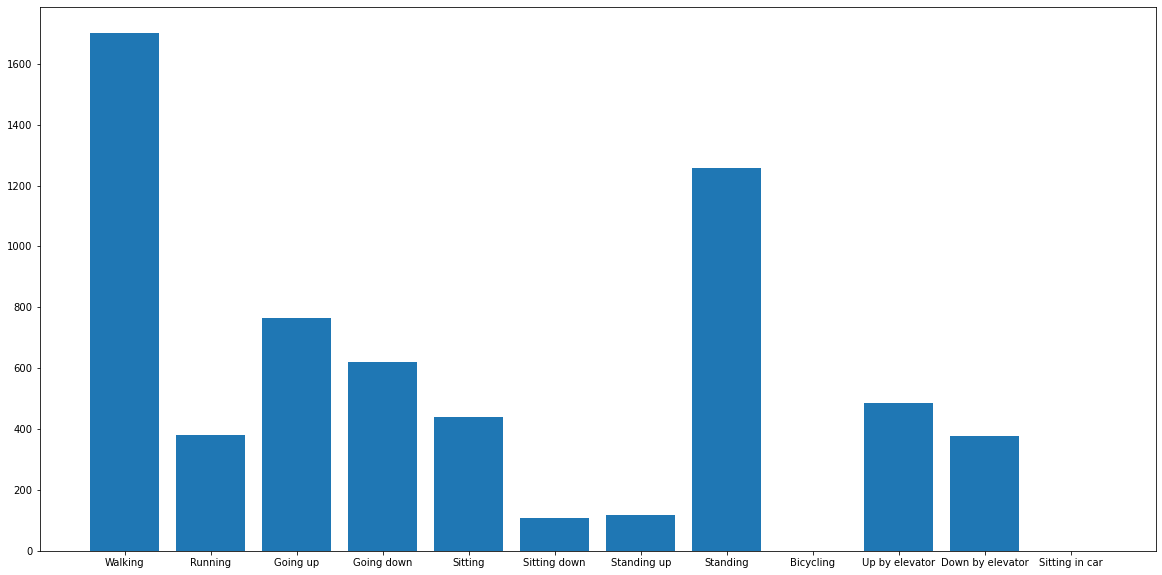

In [9]:
x_values = ['Walking', 'Running', 'Going up', 'Going down', 'Sitting', 'Sitting down', 'Standing up', 'Standing', 
               'Bicycling', 'Up by elevator',  'Down by elevator',  'Sitting in car']
# x_values = ['Walking', 'Running', 'Going up', 'Going down', 'Sitting', 'Sitting down', 'Standing up', 'Standing', 
#             'Up by elevator',  'Down by elevator']
y_values = []
y_values.append((df[(df.act == 1)]).shape[0])
y_values.append((df[(df.act == 2)]).shape[0])
y_values.append((df[(df.act == 3)]).shape[0])
y_values.append((df[(df.act == 4)]).shape[0])
y_values.append((df[(df.act == 5)]).shape[0])
y_values.append((df[(df.act == 6)]).shape[0])
y_values.append((df[(df.act == 7)]).shape[0])
y_values.append((df[(df.act == 8)]).shape[0])
y_values.append((df[(df.act == 9)]).shape[0])
y_values.append((df[(df.act == 10)]).shape[0])
y_values.append((df[(df.act == 11)]).shape[0])
y_values.append((df[(df.act == 12)]).shape[0])
print(f'num of samples: {sum(y_values)}')
print(y_values)
plt.figure(figsize=(20,10))
plt.bar(x_values, y_values, width=0.8)            

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=nTest, random_state=0)

In [11]:
# Modelo que entrenaremos 
# model = SVC(C=0.5,kernel = 'poly', degree=3, gamma='scale', coef0= 4, decision_function_shape='ovo'
#             ,shrinking=True, probability=True, verbose = True, random_state=42)
model = SVC(kernel = 'rbf', decision_function_shape='ovo')

In [12]:
# #Pruebas sin bucle
# print('\033[5;34m'+'Número de muestras:', nSamples, '// kernel: fbf'+'\033[0;m')
# list_acc, time = Modulo_SVM.modl(model, X_train, y_train, X_test, y_test, 10)
# mean_acc = np.mean(list_acc)
# print('\033[5;32m'+'Accuracy medio:', mean_acc, '\n'+'\033[0;m')

In [13]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
#     print(train_sizes)
#     print(f'PUTITAA TIME: {fit_times}')
#     print(f'PUTITAA SIZE TRAIN: {train_scores.shape}')
#     print(f'PUTITAA SIZE TEST: {test_scores.shape}')
#     print(f'PUTITAA TRAIN: {np.mean(train_scores, axis=1)}')
    list_test = np.mean(test_scores, axis=1)
    print(f'PUTITAA TEST: {list_test[-1]}')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
#     axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
#                          train_scores_mean + train_scores_std, alpha=0.1,
#                          color="r")
#     axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
#                          test_scores_mean + test_scores_std, alpha=0.1,
#                          color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


# fig, axes = plt.subplots(3, 2, figsize=(10, 15))

# X, y = load_digits(return_X_y=True)

# title = "Learning Curves (Naive Bayes)"
# # Cross validation with 100 iterations to get smoother mean test and train
# # score curves, each time with 20% data randomly selected as a validation set.
# cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

# estimator = GaussianNB()
# plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.7, 1.01),
#                     cv=cv, n_jobs=4)

# title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# # SVC is more expensive so we do a lower number of CV iterations:
# cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
# estimator = SVC(gamma=0.001)
# plot_learning_curve(estimator, title, X, y, axes=axes[:, 1], ylim=(0.7, 1.01),
#                     cv=cv, n_jobs=4)


# plt.show()

[ 437 1421 2406 3390 4375]
PUTITAA TEST: 0.7388000000000001


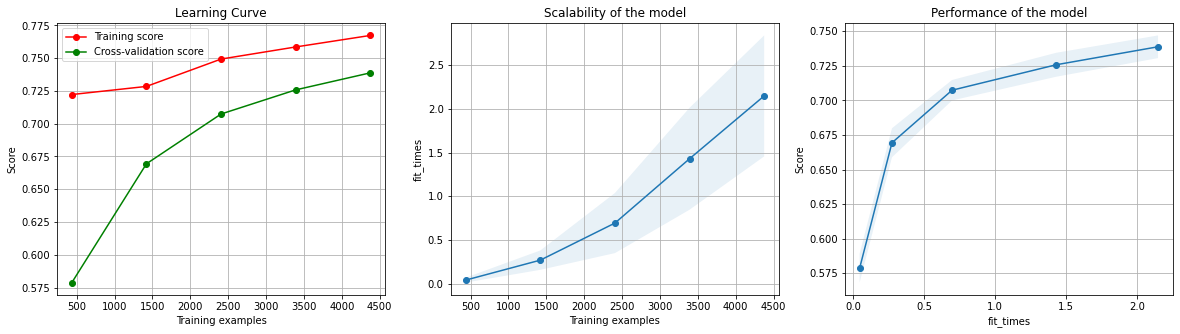

In [14]:
#Graficas de validación, perdida y escalabilidad con la función learning_curve
metrics_graphic = plot_learning_curve(model, 'Learning Curve', X_train, y_train, axes=None, ylim=None, cv=8,
                        n_jobs=2)
metrics_graphic.show()

In [15]:
# svm_cv  = tune("svm", y ~ X1 + X2, data = datos,
#                kernel = 'poly',
#                ranges = list(cost = c(0.001, 0.01, 0.1, 1, 5, 10, 20, 50, 100,
#                                       150, 200)))
# summary(svm_cv)

In [16]:
# Lista de muestras [0, 1, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000, 65000, 70000, 75000, 80000, 85000]
# lista de tiempos [0, 0, 39718750000, 135718750000, 265937500000, 345343750000, 277421875000, 394828125000, 481390625000, 588859375000, 739046875000, 926046875000, 1129531250000, 1412500000000, 1758062500000, 2197656250000, 2607500000000, 3781156250000, 7050062500000]